In [1]:
import os
import re
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections

from kolmov import ktable, kplot

Welcome to JupyROOT 6.16/00
Using all sub packages with ROOT dependence


In [2]:
tuned_info = collections.OrderedDict( {
              # validation
              "max_sp_val"      : 'summary/max_sp_val',
              "max_sp_pd_val"   : 'summary/max_sp_pd_val#0',
              "max_sp_fa_val"   : 'summary/max_sp_fa_val#0',
              # Operation
              "max_sp_op"       : 'summary/max_sp_op',
              "max_sp_pd_op"    : 'summary/max_sp_pd_op#0',
              "max_sp_fa_op"    : 'summary/max_sp_fa_op#0',
              # Tight
              'tight_pd_ref'    : "reference/tight_cutbased/pd_ref#0",
              'tight_fa_ref'    : "reference/tight_cutbased/fa_ref#0",
              'tight_sp_ref'    : "reference/tight_cutbased/sp_ref",
              'tight_pd_val'    : "reference/tight_cutbased/pd_val#0",
              'tight_fa_val'    : "reference/tight_cutbased/fa_val#0",
              'tight_sp_val'    : "reference/tight_cutbased/sp_val",
              'tight_pd_op'     : "reference/tight_cutbased/pd_op#0",
              'tight_fa_op'     : "reference/tight_cutbased/fa_op#0",
              'tight_sp_op'     : "reference/tight_cutbased/sp_op",
              # Medium
              'medium_pd_ref'   : "reference/medium_cutbased/pd_ref#0",
              'medium_fa_ref'   : "reference/medium_cutbased/fa_ref#0",
              'medium_sp_ref'   : "reference/medium_cutbased/sp_ref",
              'medium_pd_val'   : "reference/medium_cutbased/pd_val#0",
              'medium_fa_val'   : "reference/medium_cutbased/fa_val#0",
              'medium_sp_val'   : "reference/medium_cutbased/sp_val",
              'medium_pd_op'    : "reference/medium_cutbased/pd_op#0",
              'medium_fa_op'    : "reference/medium_cutbased/fa_op#0",
              'medium_sp_op'    : "reference/medium_cutbased/sp_op",
              # Loose
              'loose_pd_ref'    : "reference/loose_cutbased/pd_ref#0",
              'loose_fa_ref'    : "reference/loose_cutbased/fa_ref#0",
              'loose_sp_ref'    : "reference/loose_cutbased/sp_ref",
              'loose_pd_val'    : "reference/loose_cutbased/pd_val#0",
              'loose_fa_val'    : "reference/loose_cutbased/fa_val#0",
              'loose_sp_val'    : "reference/loose_cutbased/sp_val",
              'loose_pd_op'     : "reference/loose_cutbased/pd_op#0",
              'loose_fa_op'     : "reference/loose_cutbased/fa_op#0",
              'loose_sp_op'     : "reference/loose_cutbased/sp_op",
              # Very Loose
              'vloose_pd_ref'   : "reference/vloose_cutbased/pd_ref#0",
              'vloose_fa_ref'   : "reference/vloose_cutbased/fa_ref#0",
              'vloose_sp_ref'   : "reference/vloose_cutbased/sp_ref",
              'vloose_pd_val'   : "reference/vloose_cutbased/pd_val#0",
              'vloose_fa_val'   : "reference/vloose_cutbased/fa_val#0",
              'vloose_sp_val'   : "reference/vloose_cutbased/sp_val",
              'vloose_pd_op'    : "reference/vloose_cutbased/pd_op#0",
              'vloose_fa_op'    : "reference/vloose_cutbased/fa_op#0",
              'vloose_sp_op'    : "reference/vloose_cutbased/sp_op",
               # Counts
              'tight_pd_ref_passed'    : "reference/tight_cutbased/pd_ref#1",
              'tight_fa_ref_passed'    : "reference/tight_cutbased/fa_ref#1",
              'tight_pd_ref_total'    : "reference/tight_cutbased/pd_ref#2",
              'tight_fa_ref_total'    : "reference/tight_cutbased/fa_ref#2",
              
              'tight_pd_val_passed'    : "reference/tight_cutbased/pd_val#1",
              'tight_fa_val_passed'    : "reference/tight_cutbased/fa_val#1",
              'tight_pd_val_total'     : "reference/tight_cutbased/pd_val#2",
              'tight_fa_val_total'     : "reference/tight_cutbased/fa_val#2",
              
              'tight_pd_op_passed'     : "reference/tight_cutbased/pd_op#1",
              'tight_fa_op_passed'     : "reference/tight_cutbased/fa_op#1",
              'tight_pd_op_total'     : "reference/tight_cutbased/pd_op#2",
              'tight_fa_op_total'     : "reference/tight_cutbased/fa_op#2",
              } )

In [3]:
kt = ktable( tuned_info )


kt.fill( '/Volumes/castor/tunings/RingerNote_2018/v7/*/*/*.pic.gz', 'v7')
kt.fill( '/Volumes/castor/tunings/RingerNote_2018/v8/*/*.pic.gz', 'v8')
kt.fill( '/Volumes/castor/tunings/RingerNote_2018/v10/*/*/*.pic.gz', 'v10')
kt.fill( '/Volumes/castor/tunings/RingerNote_2018/v11/*/*.pic.gz', 'v11')


2020-06-01 15:22:33,248 | Py.ktable                               INFO Reading file for v7 tag...
2020-06-01 15:22:33,249 | Py.ktable                               INFO There are 1000 files for this task...
2020-06-01 15:22:33,249 | Py.ktable                               INFO Filling the table... 
2020-06-01 15:22:50,836 | Py.ktable                               INFO End of fill step, a pandas DataFrame was created...
2020-06-01 15:22:51,224 | Py.ktable                               INFO Reading file for v8 tag...
2020-06-01 15:22:51,224 | Py.ktable                               INFO There are 1000 files for this task...
2020-06-01 15:22:51,224 | Py.ktable                               INFO Filling the table... 
2020-06-01 15:23:05,159 | Py.ktable                               INFO End of fill step, a pandas DataFrame was created...
2020-06-01 15:23:05,334 | Py.ktable                               INFO Reading file for v10 tag...
2020-06-01 15:23:05,334 | Py.ktable                    

In [4]:
table = kt.get_pandas_table()
table.head(10)

,train_tag,et_bin,eta_bin,model_idx,sort,init,file_name,tuned_idx,max_sp_val,max_sp_pd_val,...,tight_pd_ref_total,tight_fa_ref_total,tight_pd_val_passed,tight_fa_val_passed,tight_pd_val_total,tight_fa_val_total,tight_pd_op_passed,tight_fa_op_passed,tight_pd_op_total,tight_fa_op_total
0,v7,0,0,0,5,0,/Volumes/castor/tunings/RingerNote_2018/v7/use...,0,0.980861,0.993902,...,226243,187639,32983.0,882.0,33738,33738,329834.0,9837.0,337384,337384
1,v7,0,0,1,5,0,/Volumes/castor/tunings/RingerNote_2018/v7/use...,1,0.981573,0.993902,...,226243,187639,32983.0,853.0,33738,33738,329834.0,9372.0,337384,337384
2,v7,0,0,2,5,0,/Volumes/castor/tunings/RingerNote_2018/v7/use...,2,0.981709,0.993902,...,226243,187639,32983.0,847.0,33738,33738,329834.0,9345.0,337384,337384
3,v7,0,0,3,5,0,/Volumes/castor/tunings/RingerNote_2018/v7/use...,3,0.974024,0.983740,...,226243,187639,32983.0,1141.0,33738,33738,329834.0,15978.0,337384,337384
4,v7,0,0,4,5,0,/Volumes/castor/tunings/RingerNote_2018/v7/use...,4,0.973855,0.985772,...,226243,187639,32983.0,1122.0,33738,33738,329834.0,15490.0,337384,337384
5,v7,0,0,5,9,0,/Volumes/castor/tunings/RingerNote_2018/v7/use...,0,0.974568,0.985743,...,226243,187639,32982.0,1140.0,33738,33738,329834.0,11734.0,337384,337384
6,v7,0,0,6,9,0,/Volumes/castor/tunings/RingerNote_2018/v7/use...,1,0.970594,0.987780,...,226243,187639,32982.0,1415.0,33738,33738,329834.0,14994.0,337384,337384
7,v7,0,0,7,9,0,/Volumes/castor/tunings/RingerNote_2018/v7/use...,2,0.969939,0.993890,...,226243,187639,32982.0,1445.0,33738,33738,329834.0,15766.0,337384,337384
8,v7,0,0,8,9,0,/Volumes/castor/tunings/RingerNote_2018/v7/use...,3,0.969040,0.991853,...,226243,187639,32982.0,1481.0,33738,33738,329834.0,16997.0,337384,337384
9,v7,0,0,0,7,1,/Volumes/castor/tunings/RingerNote_2018/v7/use...,0,0.968984,0.983707,...,226243,187639,32982.0,1398.0,33738,33738,329834.0,15231.0,337384,337384


### Get the best inits table

In [5]:
best_inits = kt.filter_inits("max_sp_val")
best_inits.head()

,train_tag,et_bin,eta_bin,model_idx,sort,init,file_name,tuned_idx,max_sp_val,max_sp_pd_val,...,tight_pd_ref_total,tight_fa_ref_total,tight_pd_val_passed,tight_fa_val_passed,tight_pd_val_total,tight_fa_val_total,tight_pd_op_passed,tight_fa_op_passed,tight_pd_op_total,tight_fa_op_total
0,v7,0,0,0,5,0,/Volumes/castor/tunings/RingerNote_2018/v7/use...,0,0.980861,0.993902,...,226243,187639,32983.0,882.0,33738,33738,329834.0,9837.0,337384,337384
0,v8,0,0,0,0,0,/Volumes/castor/tunings/RingerNote_2018/v8/use...,0,0.976650,0.981878,...,226243,187639,40467.0,1089.0,41389,41389,404640.0,10536.0,413882,413882
0,v10,0,0,0,4,0,/Volumes/castor/tunings/RingerNote_2018/v10/us...,0,0.980745,0.985591,...,226243,187639,40460.0,802.0,41388,41388,404638.0,7382.0,413882,413882
0,v11,0,0,0,0,0,/Volumes/castor/tunings/RingerNote_2018/v11/us...,0,0.980546,0.986210,...,226243,187639,40472.0,816.0,41389,41389,404632.0,7739.0,413882,413882
9,v7,0,0,0,7,1,/Volumes/castor/tunings/RingerNote_2018/v7/use...,0,0.968984,0.983707,...,226243,187639,32982.0,1398.0,33738,33738,329834.0,15231.0,337384,337384


### Get the Cross validation table

In [6]:
# Get the eff table for all tunings
cv_table = kt.describe( best_inits )
cv_table.head()

,train_tag,et_bin,eta_bin,max_sp_val_mean,max_sp_val_std,max_sp_pd_val_mean,max_sp_pd_val_std,max_sp_fa_val_mean,max_sp_fa_val_std,max_sp_op_mean,...,tight_pd_ref_total,tight_fa_ref_total,tight_pd_val_total_mean,tight_pd_val_total_std,tight_fa_val_total_mean,tight_fa_val_total_std,tight_pd_op_total_mean,tight_pd_op_total_std,tight_fa_op_total_mean,tight_fa_op_total_std
0,v7,0,0,0.974651,0.005283,0.984663,0.007186,0.035301,0.006311,0.972165,...,226243,187639,33738.446541,0.498705,33738.446541,0.498705,337384.0,0.0,337384.0,0.0
1,v7,0,4,0.959800,0.009140,0.987120,0.015899,0.067031,0.018059,0.944701,...,19330,15512,4111.404494,0.493575,4111.404494,0.493575,41114.0,0.0,41114.0,0.0
2,v7,0,3,0.956667,0.004898,0.972643,0.008062,0.059152,0.008724,0.954273,...,220933,205792,33620.887500,0.317974,33620.887500,0.317974,336209.0,0.0,336209.0,0.0
3,v7,0,1,0.958475,0.005676,0.972969,0.009704,0.055861,0.012615,0.954519,...,136848,143657,25682.658683,0.475578,25682.658683,0.475578,256826.0,0.0,256826.0,0.0
4,v7,0,2,0.942235,0.007732,0.962439,0.021899,0.077578,0.017791,0.932581,...,50009,30037,4967.548611,0.499368,4967.548611,0.499368,49676.0,0.0,49676.0,0.0


### Get the integrated table for v8 tag

In [7]:
# Get integrated table
int_table = kt.integrate( best_inits, 'v8')
(int_table.head()*100).round(4)

,tight_pd_ref,tight_fa_ref,tight_pd_val,tight_fa_val,tight_pd_op,tight_fa_op
mean,99.0288,25.4856,99.0647,1.5805,99.0648,1.5811
std,0.0308,1.0459,0.0189,0.0655,0.0186,0.0548


### Create the Beamer Presentation

In [8]:
# Create beamer presentation
kt.dump_beamer_table( best_inits ,  [15,20,25,30,40,50], 
                     [0, 0.8 , 1.37, 1.54, 2.37, 2.5], 
                     ['tight'],
                     tags = ['v7','v8','v10', 'v11'])

2020-06-01 15:25:07,187 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file test.pdf latex code...


### Create monitoring plots

In [12]:
# Dump all v8 training for each tag
kt.dump_all_history( best_inits, 'history_v10','v10' )

KeyError: 'et0_eta0_sort_4'

2020-06-01 15:40:35,866 | Py.kplot                                INFO Reading 1898 files...


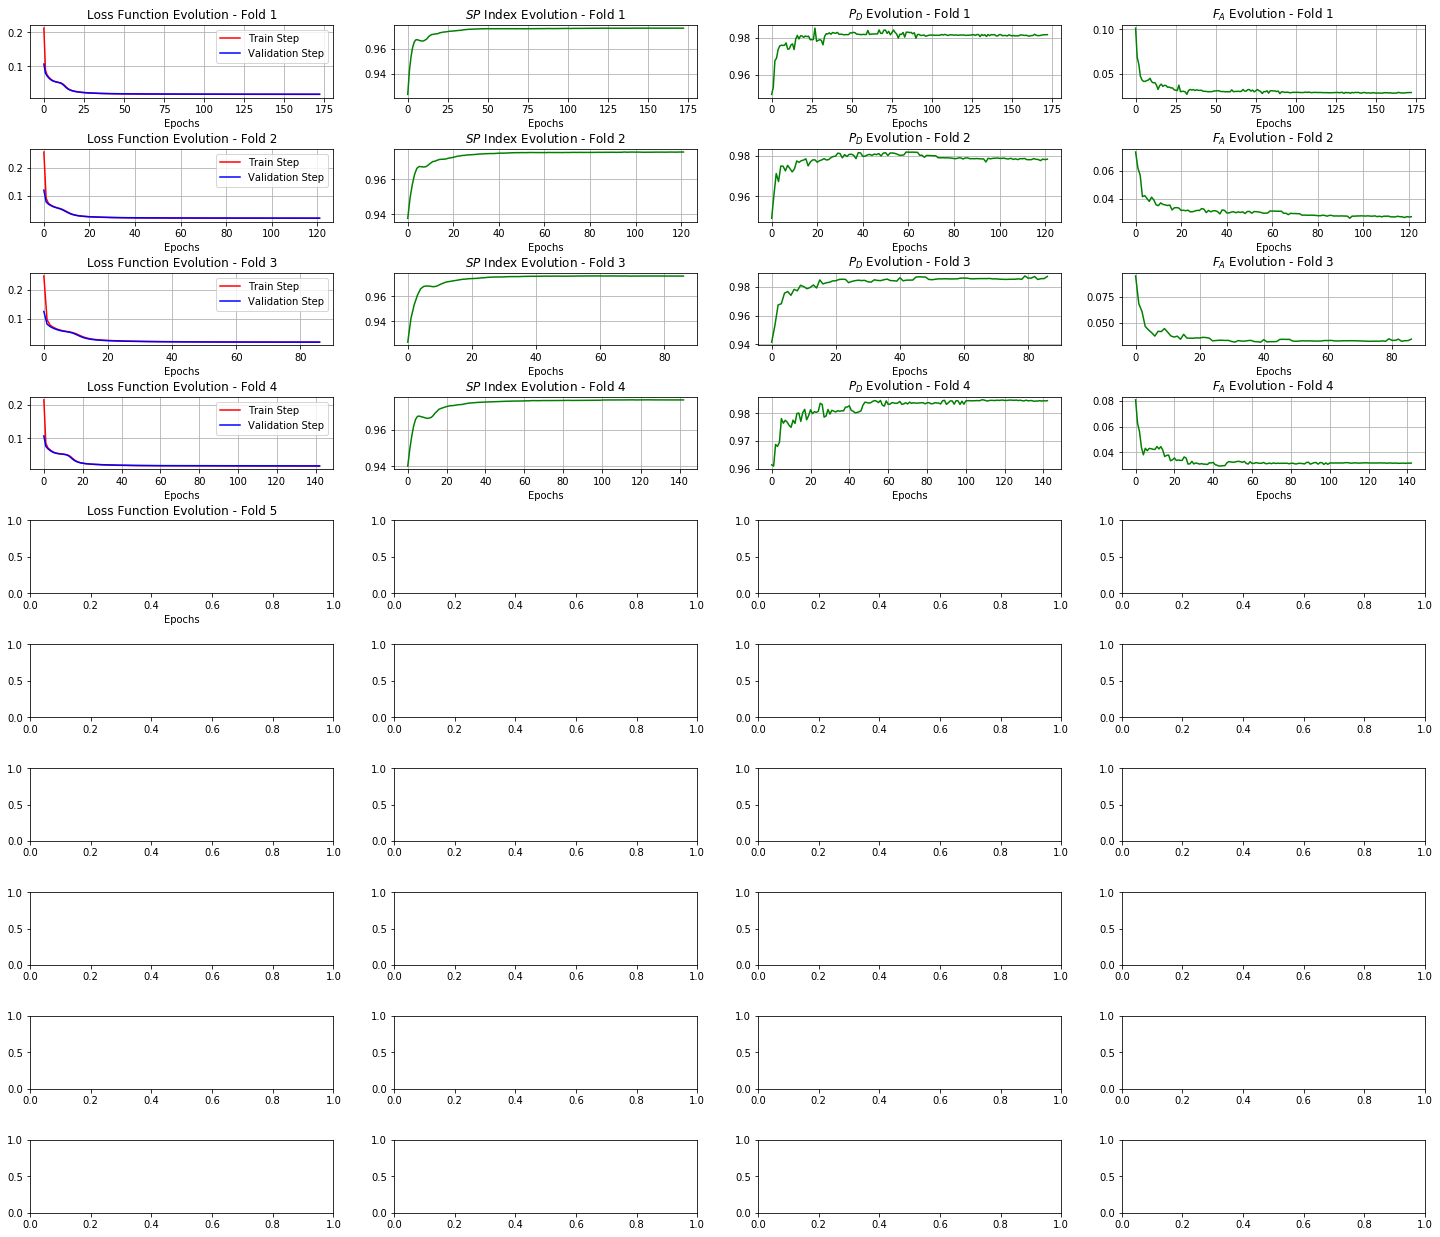

In [13]:
from kolmov import kplot    
kplot( 'history_v8', 1).plot_training_curves(0, 0, '.', 'test')